In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

import warnings # to ignore the warnings
warnings.filterwarnings('ignore')

<ipython-input-1-d0fca1f312bf>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
train = pd.read_csv('Train.csv')
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [3]:
test = pd.read_csv('Test.csv')
test

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00
...,...,...
5107,23395,26-04-2015 19:00
5108,23396,26-04-2015 20:00
5109,23397,26-04-2015 21:00
5110,23398,26-04-2015 22:00


In [4]:
train.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [5]:
test.isnull().sum()

ID          0
Datetime    0
dtype: int64

In [6]:
train_copy = train.copy()
test_copy = test.copy()

In [7]:
2*train.shape[0]/3

12192.0

In [8]:
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [9]:
# Splitting train data into train and valid data

train = train.loc[:12192]
valid = train_copy.loc[12193:]

In [10]:
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
12188,12188,14-01-2014 20:00,204
12189,12189,14-01-2014 21:00,210
12190,12190,14-01-2014 22:00,196
12191,12191,14-01-2014 23:00,206


In [11]:
valid

,ID,Datetime,Count
12193,12193,15-01-2014 01:00,164
12194,12194,15-01-2014 02:00,98
12195,12195,15-01-2014 03:00,80
12196,12196,15-01-2014 04:00,46
12197,12197,15-01-2014 05:00,98
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [12]:
train.set_index('Datetime', inplace = True)
valid.set_index('Datetime', inplace = True)
test.set_index('Datetime', inplace = True)

In [13]:
train

,ID,Count
Datetime,,
25-08-2012 00:00,0,8
25-08-2012 01:00,1,2
25-08-2012 02:00,2,6
25-08-2012 03:00,3,2
25-08-2012 04:00,4,2
...,...,...
14-01-2014 20:00,12188,204
14-01-2014 21:00,12189,210
14-01-2014 22:00,12190,196


In [14]:
valid

,ID,Count
Datetime,,
15-01-2014 01:00,12193,164
15-01-2014 02:00,12194,98
15-01-2014 03:00,12195,80
15-01-2014 04:00,12196,46
15-01-2014 05:00,12197,98
...,...,...
25-09-2014 19:00,18283,868
25-09-2014 20:00,18284,732
25-09-2014 21:00,18285,702


In [15]:
test

,ID
Datetime,
26-09-2014 00:00,18288
26-09-2014 01:00,18289
26-09-2014 02:00,18290
26-09-2014 03:00,18291
26-09-2014 04:00,18292
...,...
26-04-2015 19:00,23395
26-04-2015 20:00,23396
26-04-2015 21:00,23397


In [16]:
train.dtypes

ID       int64
Count    int64
dtype: object

In [17]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y %H:%M')

train.index = train.index.map(parser)
valid.index = valid.index.map(parser)
test.index = test.index.map(parser)
train.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


## STATIONARITY CHECK

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # ROLLING STATISTICS AND DICKEY FULLER TEST
    
    
    rolmean = pd.Series(timeseries).rolling(window=24).mean() # 24 hours on each day 
    rolstd = pd.Series(timeseries).rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    


    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

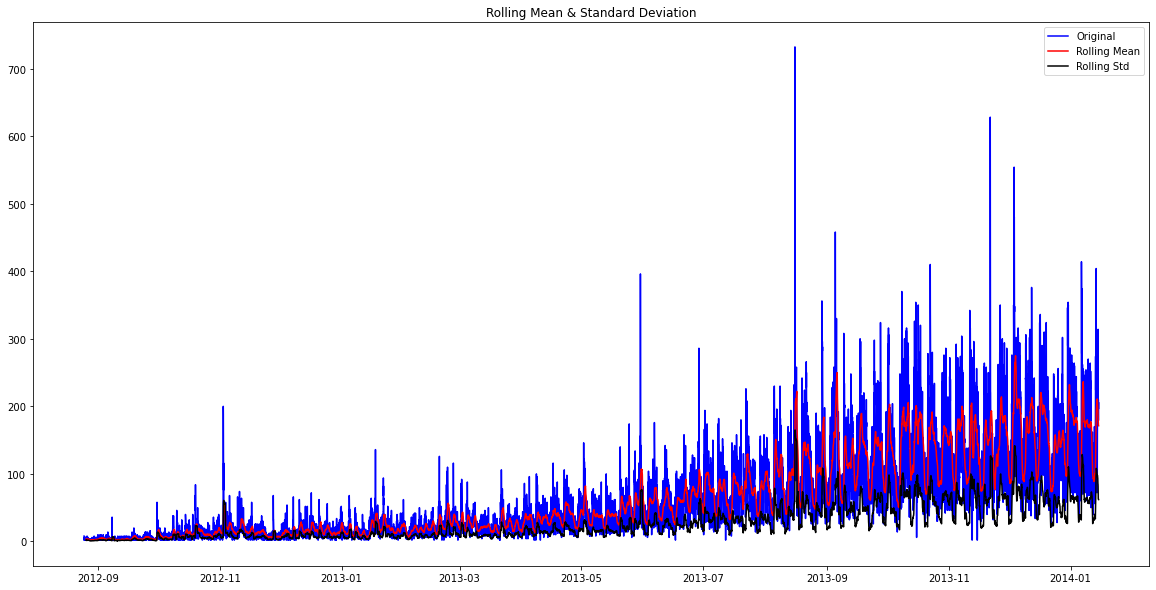

Results of Dickey-Fuller Test:
Test Statistic                -5.870107e+00
p-value                        3.255333e-07
#Lags Used                     4.000000e+01
Number of Observations Used    1.215200e+04
Critical Value (1%)           -3.430888e+00
Critical Value (5%)           -2.861778e+00
Critical Value (10%)          -2.566897e+00
dtype: float64


In [19]:
test_stationarity(train['Count'])

Test Statistic shows that the data is stationary , but there is an increasing trend. So we should make the data more stationary
by removing trend and seasonality.

## MAKING DATA MORE STATIONARY
## Smoothing 

Time series datasets may contain trends and seasonality, which may need to be removed prior to modeling. Trends can result in a varying mean over time, whereas seasonality can result in a changing variance over time, both which define a time series as being non-stationary.

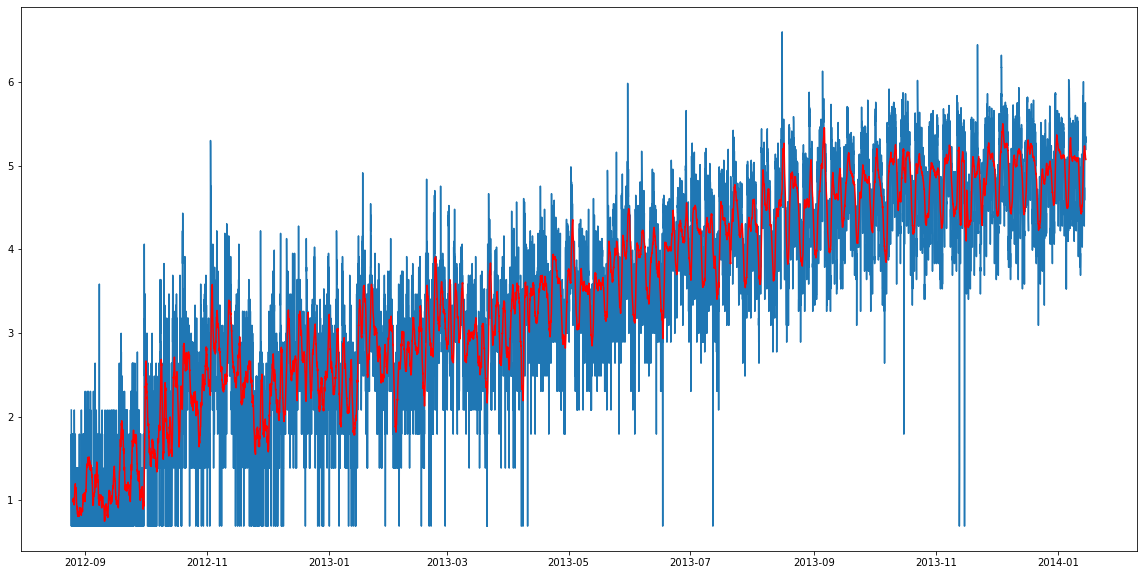

In [20]:
train_log = np.log(train['Count'])

moving_avg = pd.Series(train_log).rolling(window=24).mean()
plt.plot(train_log)
plt.plot(moving_avg, color = 'red')

In [21]:
train_log_moving_avg_diff = train_log - moving_avg # removing trend

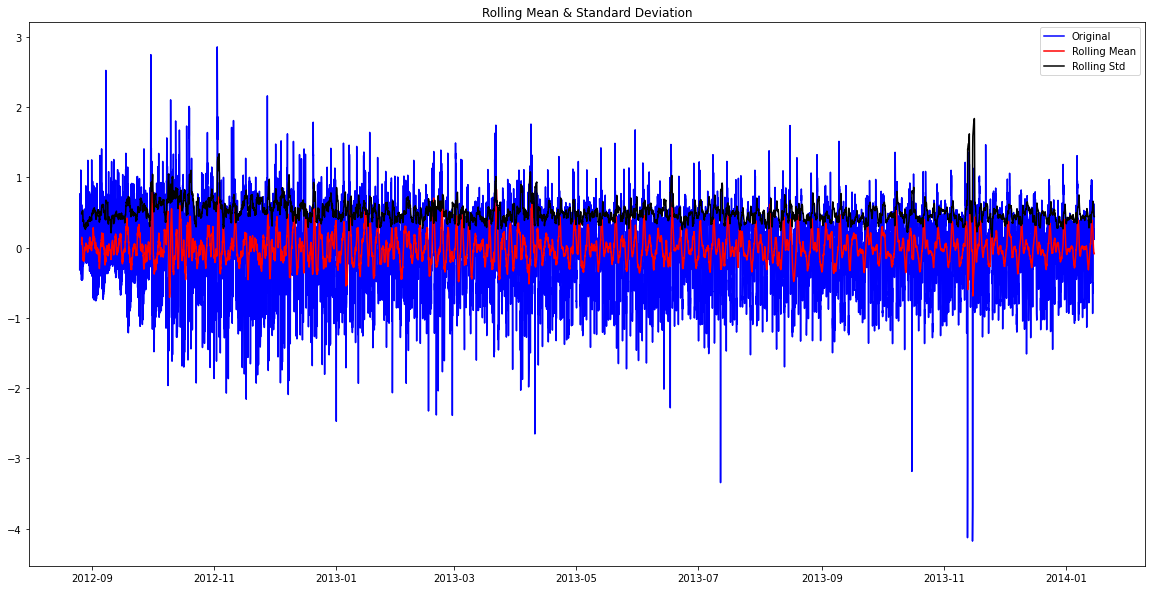

Results of Dickey-Fuller Test:
Test Statistic                   -22.510569
p-value                            0.000000
#Lags Used                        40.000000
Number of Observations Used    12129.000000
Critical Value (1%)               -3.430889
Critical Value (5%)               -2.861778
Critical Value (10%)              -2.566897
dtype: float64


In [22]:
# Since we are taking the average of 24 values, rolling mean is not defined for the first 23 values. (NaN)
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

## Differencing

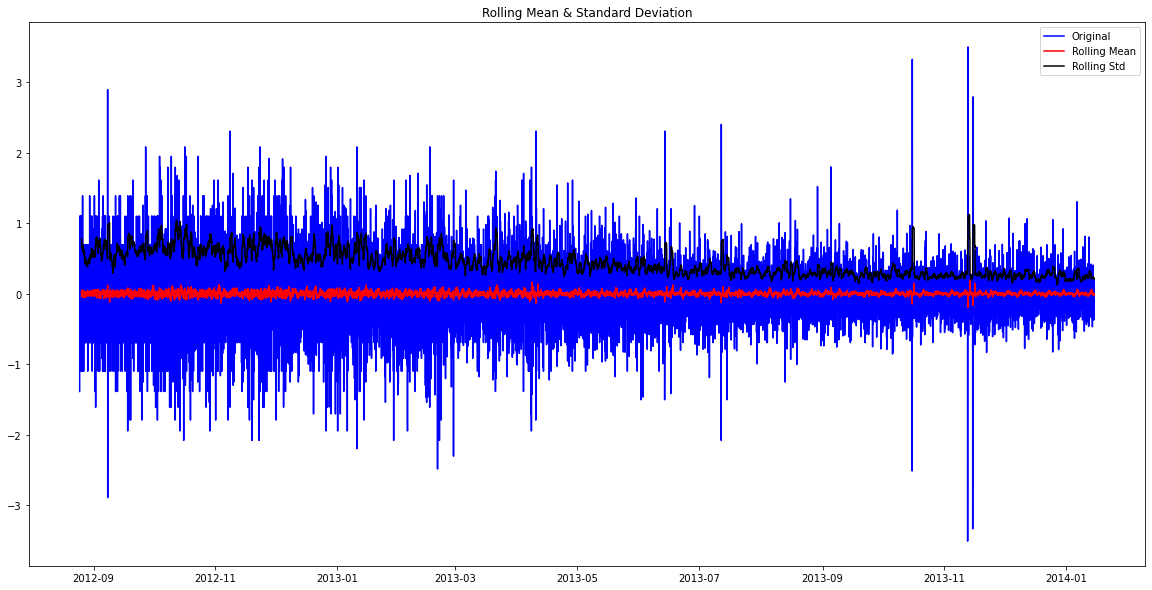

Results of Dickey-Fuller Test:
Test Statistic                   -21.889631
p-value                            0.000000
#Lags Used                        40.000000
Number of Observations Used    12151.000000
Critical Value (1%)               -3.430888
Critical Value (5%)               -2.861778
Critical Value (10%)              -2.566897
dtype: float64


In [23]:
train_log_diff = train_log - train_log.shift()
train_log_diff.dropna(inplace = True)
test_stationarity(train_log_diff)

In [24]:
train_log_diff

Datetime
2012-08-25 01:00:00   -1.386294
2012-08-25 02:00:00    1.098612
2012-08-25 03:00:00   -1.098612
2012-08-25 04:00:00    0.000000
2012-08-25 05:00:00    0.000000
                         ...   
2014-01-14 20:00:00   -0.057158
2014-01-14 21:00:00    0.028988
2014-01-14 22:00:00   -0.068993
2014-01-14 23:00:00    0.049762
2014-01-15 00:00:00   -0.134919
Name: Count, Length: 12192, dtype: float64

## Decomposition

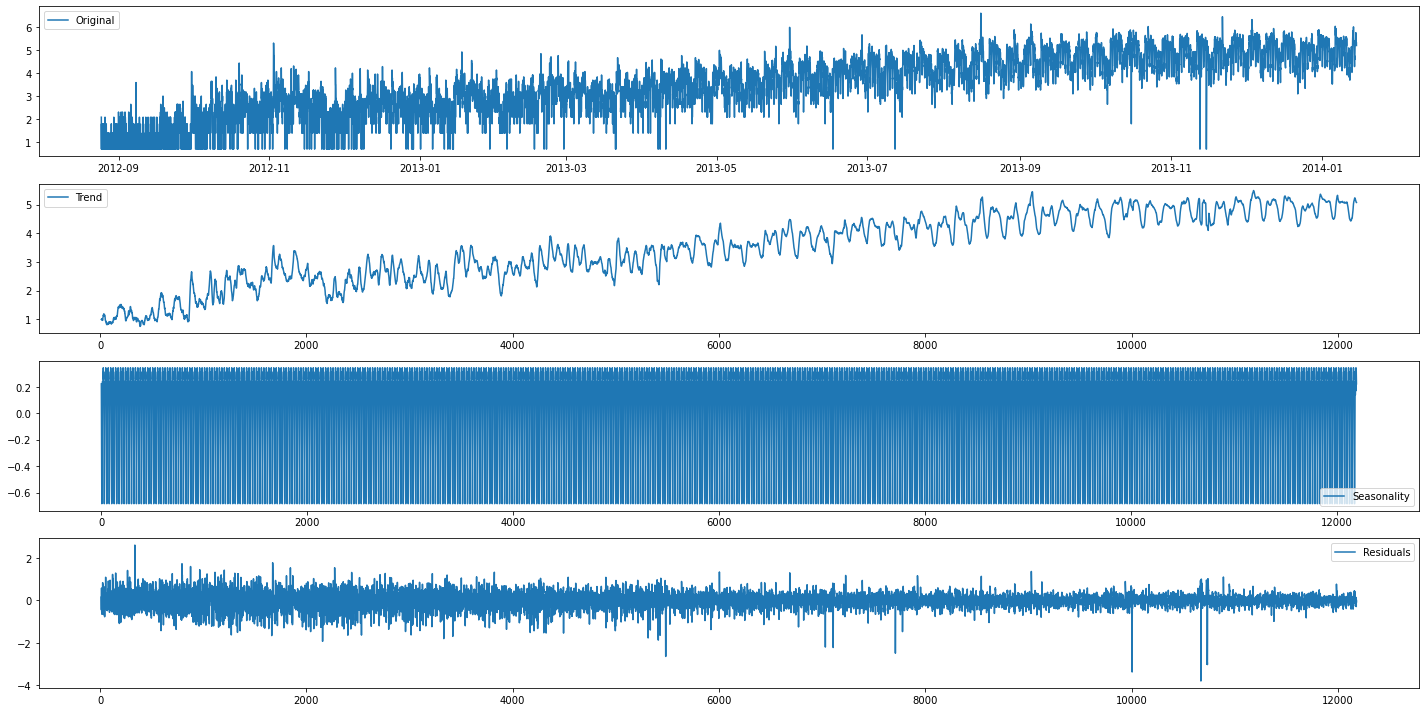

In [25]:
#Trend and Seasonality are seperately treated (de-trending and de-seasonalizing)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

No handles with labels found to put in legend.


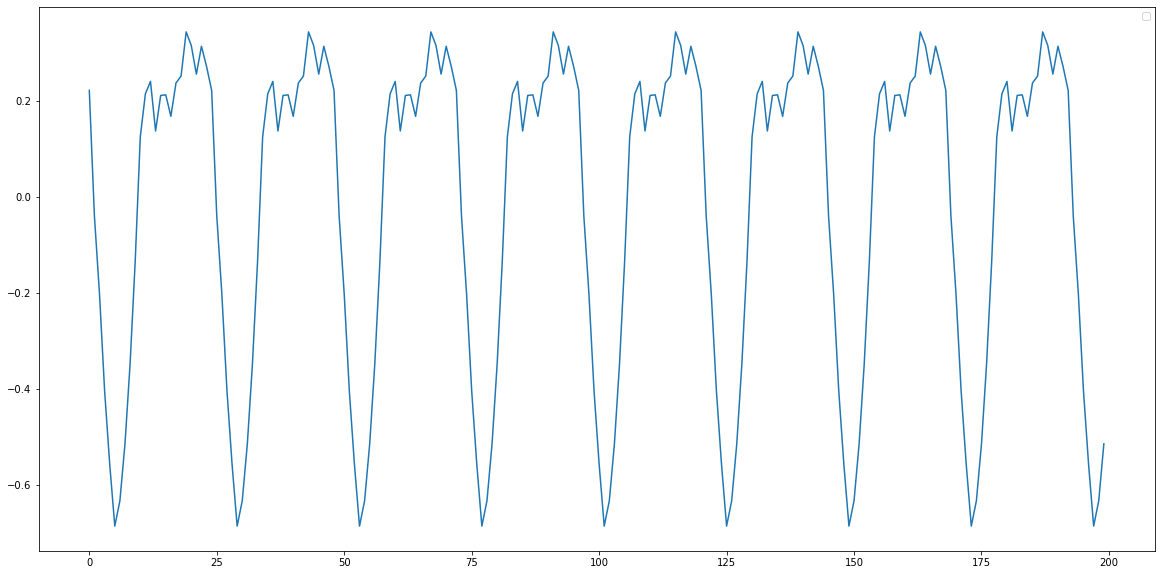

In [26]:
# Seasonality

plt.plot(seasonal[:200])
plt.legend(loc='best')

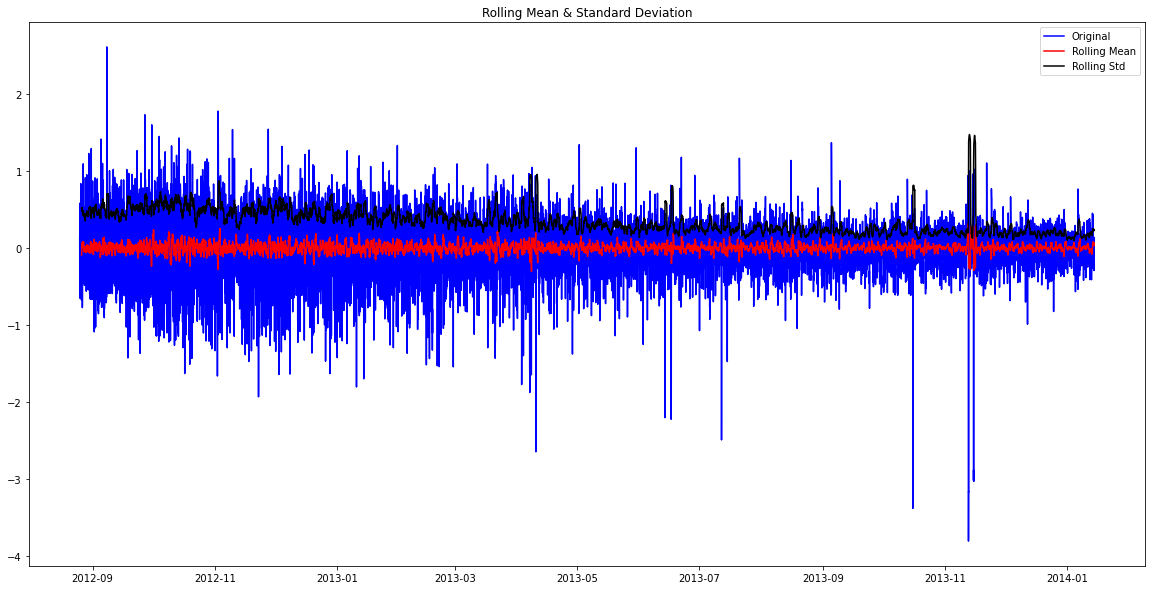

Results of Dickey-Fuller Test:
Test Statistic                   -28.600884
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    12129.000000
Critical Value (1%)               -3.430889
Critical Value (5%)               -2.861778
Critical Value (10%)              -2.566897
dtype: float64


In [27]:
# Checking stationarity of residuals

train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

## Time Series Forecast

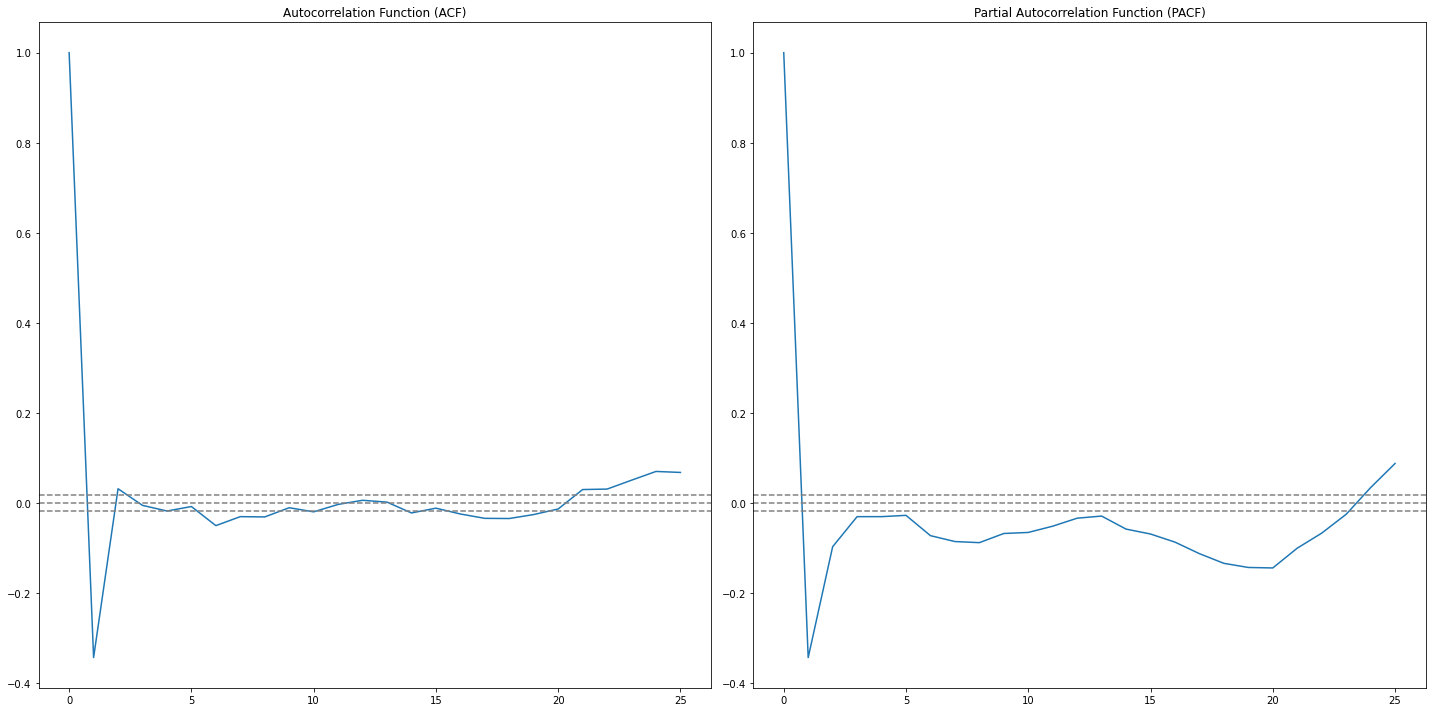

In [28]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function (ACF)')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()

In [29]:
train_log_diff

Datetime
2012-08-25 01:00:00   -1.386294
2012-08-25 02:00:00    1.098612
2012-08-25 03:00:00   -1.098612
2012-08-25 04:00:00    0.000000
2012-08-25 05:00:00    0.000000
                         ...   
2014-01-14 20:00:00   -0.057158
2014-01-14 21:00:00    0.028988
2014-01-14 22:00:00   -0.068993
2014-01-14 23:00:00    0.049762
2014-01-15 00:00:00   -0.134919
Name: Count, Length: 12192, dtype: float64

## ARIMA

In [30]:
from statsmodels.tsa.arima_model import ARIMA

## AR model

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 2373.2108')

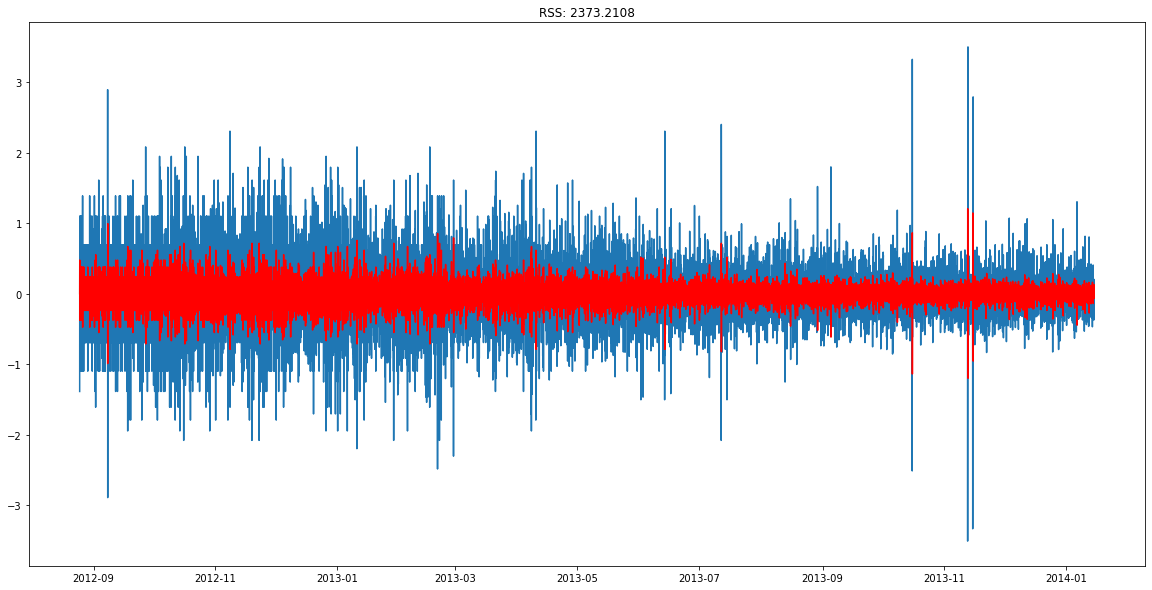

In [31]:
model = ARIMA(train_log, order=(1, 1, 0))  
AR_model = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna())
plt.plot(AR_model.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((AR_model.fittedvalues-train_log_diff)**2))

## MA model

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 2347.6949')

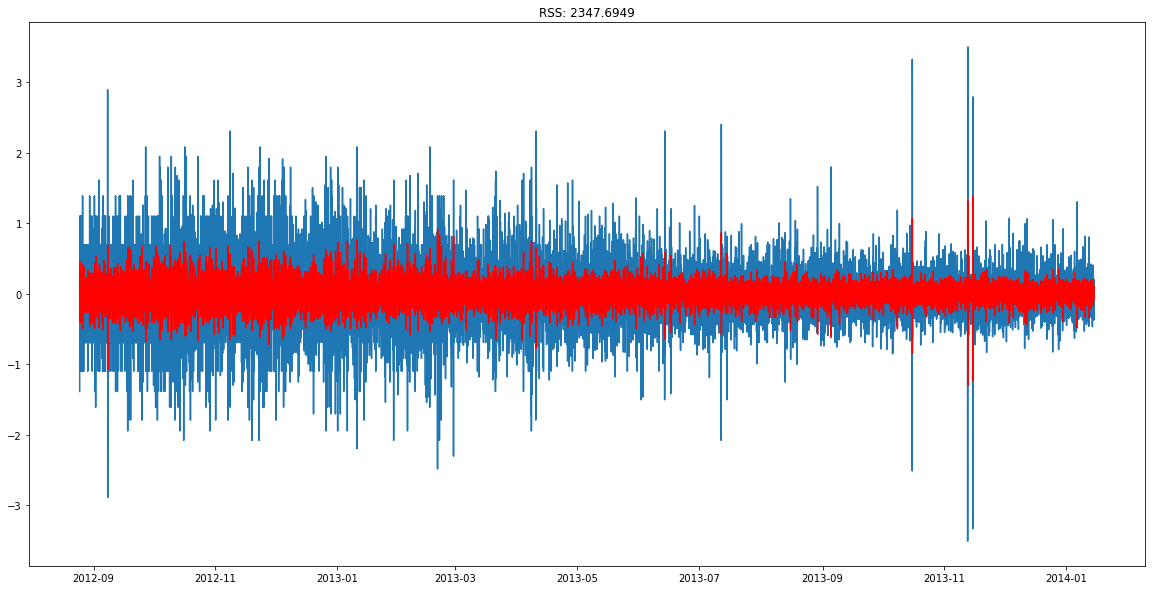

In [32]:
model = ARIMA(train_log, order=(0, 1, 1))  
MA_model = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna())
plt.plot(MA_model.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((MA_model.fittedvalues-train_log_diff)**2))

## Combined ARIMA model

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 2346.9797')

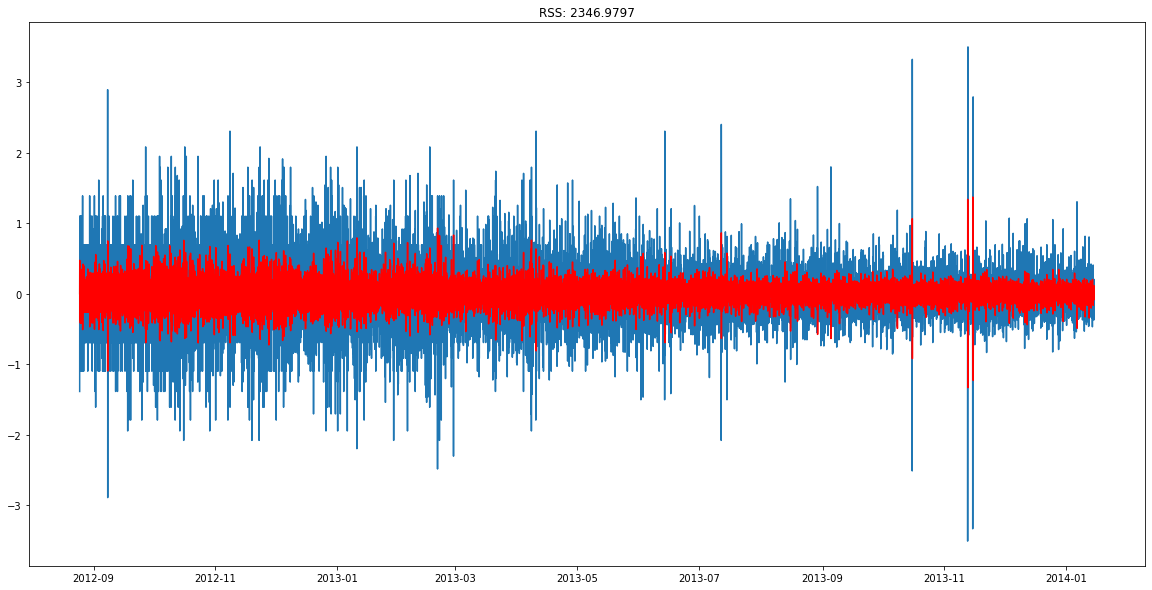

In [33]:
model = ARIMA(train_log, order=(1, 1, 1))  
ARIMA_model = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna())
plt.plot(ARIMA_model.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((ARIMA_model.fittedvalues-train_log_diff)**2))

## Scaling back to the original values and examine the performances

In [34]:
#bring the differencing back to the original scale
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))

In [35]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))

In [36]:
model = ARIMA(train_log.dropna(), order=(1, 1, 1))  
ARIMA_model = model.fit(disp=-1)  
predictions_ARIMA_diff = pd.Series(ARIMA_model.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


Datetime
2012-08-25 01:00:00    0.000293
2012-08-25 02:00:00    0.471815
2012-08-25 03:00:00   -0.262835
2012-08-25 04:00:00    0.333617
2012-08-25 05:00:00    0.108603
dtype: float64


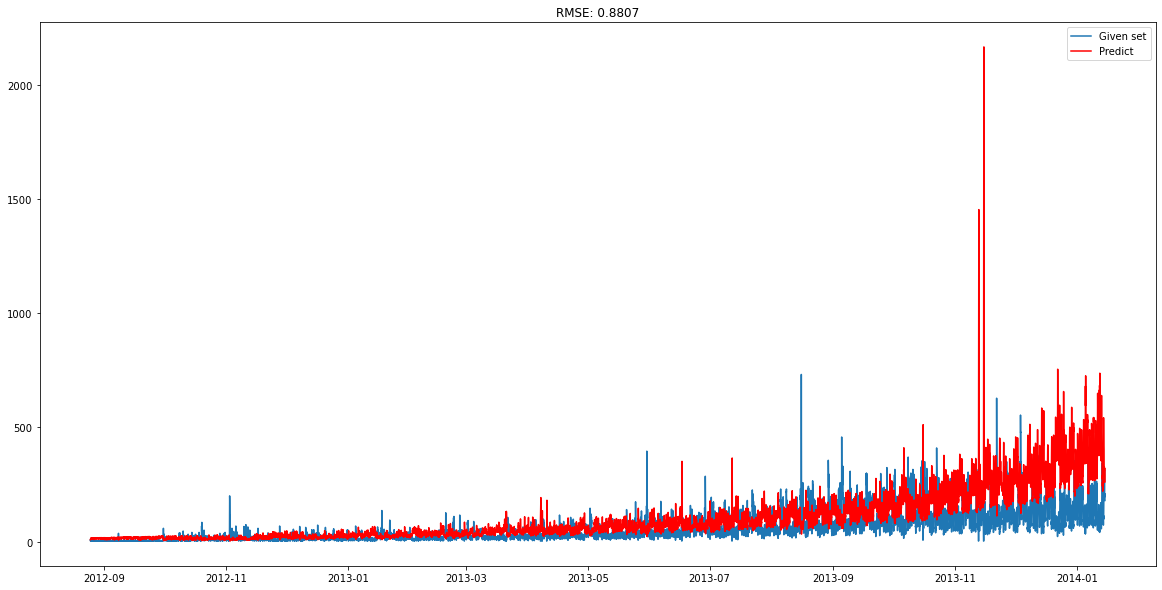

In [37]:
check_prediction_diff(predictions_ARIMA_diff, train)

In [38]:
start = train.shape[0]
end = start + valid.shape[0]
valid_predict_diff = ARIMA_model.predict(start = start-1, end = end-2, typ = 'levels')
print (valid_predict_diff.head())
print (valid_predict_diff.tail())

2014-01-15 00:00:00    5.318737
2014-01-15 01:00:00    5.241758
2014-01-15 02:00:00    5.239298
2014-01-15 03:00:00    5.239748
2014-01-15 04:00:00    5.240032
Freq: H, dtype: float64
2014-09-25 18:00:00    7.023511
2014-09-25 19:00:00    7.023804
2014-09-25 20:00:00    7.024097
2014-09-25 21:00:00    7.024390
2014-09-25 22:00:00    7.024683
Freq: H, dtype: float64


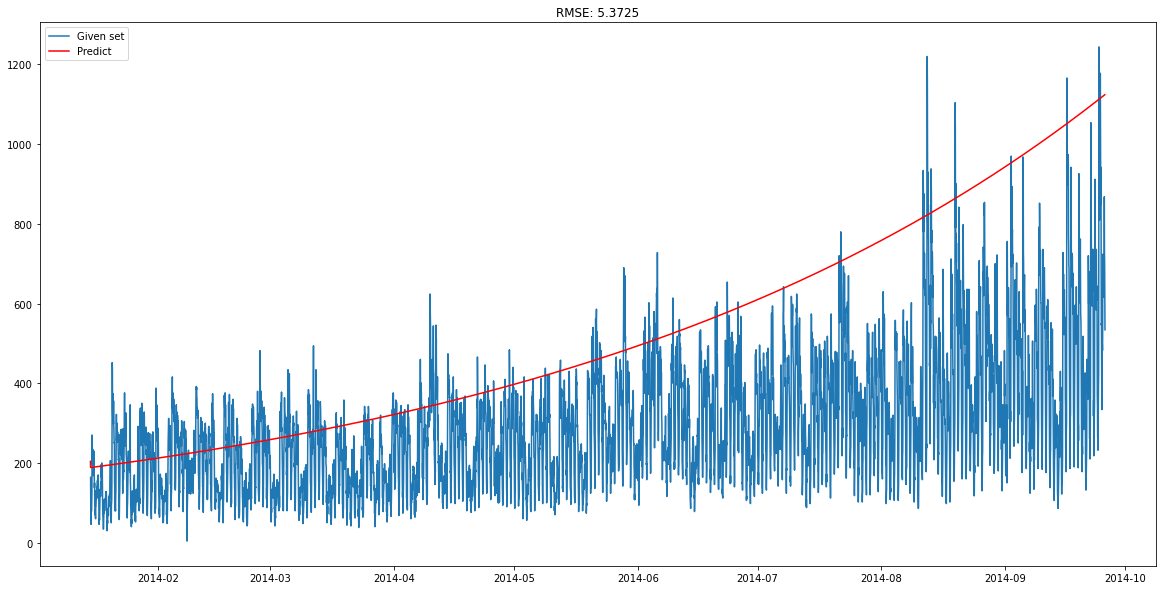

In [39]:
check_prediction_log(valid_predict_diff, valid)